#### Evaluation - Comparing Our Models 

In [1]:
# imports 
import matplotlib.pyplot as plt
import numpy as np

##### Perplexity Across Models and Genres on Test Dataset 

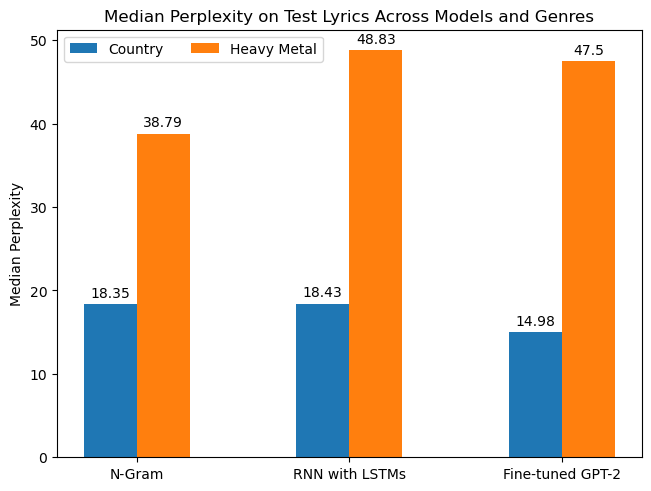

In [8]:
# created with reference to matplotlib documentation https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

models = ("N-Gram", "RNN with LSTMs", "Fine-tuned GPT-2")
genres = {
    # FAKE NUMBERS -- REPLACE!!! 
    'Country': (18.35, 18.43, 14.98),
    'Heavy Metal': (38.79, 48.83, 47.50),
}

x = np.arange(len(models))  # label locations
width = 0.25  # the width of the bars
multiplier = .5

fig, ax = plt.subplots(layout='constrained')

for genre, perplexity in genres.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, perplexity, width, label=genre)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Median Perplexity')
ax.set_title('Median Perplexity on Test Lyrics Across Models and Genres')
ax.set_xticks(x + width, models)
ax.legend(loc='upper left', ncols=3)

plt.show()